<a href="https://colab.research.google.com/github/Mwanaidii/Mwanaidii-Sentiment-Analysis-of-Jumia-Kilimall-and-Jiji-for-App-X-Development-Insights-Python/blob/main/SENTIMENT_ANALYSIS_3_STORES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####INTRODUCTION:
With the rapid growth of e-commerce in Kenya, platforms like Jumia, Kilimall, and Jiji are competing to offer the best user experience. This project analyzes customer reviews from these platforms using sentiment analysis, providing real-time insights to inform the development of a new e-commerce app, "X."

The analysis visualizes trends in positive, neutral, and negative feedback, helping the developers of App X understand user experiences and make data-driven decisions to improve the app, ultimately creating a user-focused platform tailored to the Kenyan market.


####1. Importing Libraries

In [2]:
!pip install google_play_scraper
!pip install emoji
!pip install wordcloud
!pip install TextBlob

## We can use libraries like NLTK, Gensim, TextBlob, spaCY, CoreNLP for data pre-processing and sentiment analysis.
## We will use NLTK for pre-processing of data and TextBlob to calculate sentiment score (sentiment polarity and subjectivity ).

In [3]:
# importing important libraries
from google_play_scraper import Sort, reviews_all, reviews, app
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import string
import emoji
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

####2. Jumia, Kilimall and Jiji Reviews Web Scrapping, Data Importation and data description

a) Web scrapping and Loading Data

In [4]:
#scrap Jumia reviews
Jumia, continuation_token = reviews(
    'com.jumia.android',
    sort = Sort.MOST_RELEVANT, # sort using at( date and time)
    count = 1000,
    filter_score_with = None
    )

#scrap Kilimall reviews
Kilimall, continuation_token = reviews(
    'net.kilimall.shop',
    sort = Sort.MOST_RELEVANT,
    count = 1000,
    filter_score_with = None
)

#scrap Jiji reviews
Jiji, continuation_token = reviews(
    'com.olx.ssa.ke',
    sort = Sort.MOST_RELEVANT,
    #count = 1000,
    filter_score_with = None
)

b) Data Importation ( Jumia, Kilimall, Jiji)

In [5]:
#Converting the scrapped data to Data Frame(Structured data) for our analysis.
pd.reset_option('display.max_colwidth')
#Convert Jumia data into a data frame
Jumia_rawdata = pd.DataFrame(np.array(Jumia), columns = ['review'])
Jumia_rawdata = Jumia_rawdata.join(pd.DataFrame(Jumia_rawdata.pop('review').tolist()))
Jumia_rawdata.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,c6ecd0fa-edb1-461a-b457-bd37fee531a4,All Shipper,https://play-lh.googleusercontent.com/a/ACg8oc...,The app improves and is consumer friendly. The...,4,2133,16.6.1,2024-11-23 07:37:21,We are honored that you have chosen us and pla...,2024-11-26 10:46:58,16.6.1
1,cc7f01e9-4695-4953-8d58-ef0f0eb7679f,Olawande Adebayo,https://play-lh.googleusercontent.com/a-/ALV-U...,It's an easy to use app with just one challeng...,4,18,7.6,2021-11-03 09:45:20,"Thank you , dear Adebayo ^^",2018-02-13 14:03:12,7.6
2,d367c2b9-f07f-4664-aaac-a514fc5c9548,PablAnu Coats,https://play-lh.googleusercontent.com/a-/ALV-U...,"Very helpful, can find a lot of items. But som...",4,204,14.14.0,2024-05-02 07:24:39,Thank you so much ! We're trying our best to m...,2024-05-03 10:38:52,14.14.0
3,531e70b7-a702-4de5-84e9-a18f27f05b9a,Brendah Akoth,https://play-lh.googleusercontent.com/a-/ALV-U...,Great app for shopping. I use it all the time ...,5,1241,16.4.1,2024-12-23 22:44:20,What a wonderful review ! We’re having this hu...,2024-12-24 09:40:57,16.4.1
4,9773a509-dd0d-4bc5-8ead-1d0aecc77eed,cece nene,https://play-lh.googleusercontent.com/a/ACg8oc...,The only good thing about this is that it's on...,1,3,5.11.1,2020-05-03 16:11:06,None,NaT,5.11.1


In [6]:
#Convert Kilimall data into a data frame
Kilimall_rawdata = pd.DataFrame(np.array(Kilimall), columns = ['review'])
Kilimall_rawdata = Kilimall_rawdata.join(pd.DataFrame(Kilimall_rawdata.pop('review').tolist()))
Kilimall_rawdata.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2786f874-37e7-4fea-92f7-02808c84617b,Naseem Ahmed,https://play-lh.googleusercontent.com/a/ACg8oc...,"Hey Kilimall, I've noticed that after the rece...",5,20,5.9.1,2025-04-24 10:51:00,"Hi, sorry for the inconvenience caused. We kno...",2025-04-24 06:19:22,5.9.1
1,09ee17a9-5009-435e-a692-f37fd892a504,ndanu fridah,https://play-lh.googleusercontent.com/a-/ALV-U...,I ordered neckband earphones. And I read the d...,1,20,5.8.1,2025-03-29 04:23:43,"Dear customer, we feel sorry for unhappy exper...",2025-04-11 04:02:19,5.8.1
2,7b6c75a9-a9ac-4819-ac66-258899b69978,Muzamil Ahmed,https://play-lh.googleusercontent.com/a-/ALV-U...,"I ordered four products, and three came at the...",1,0,5.9.1,2025-04-30 17:34:36,None,NaT,5.9.1
3,da4a28a9-d18e-4113-8125-a053435d0581,daniel sila,https://play-lh.googleusercontent.com/a-/ALV-U...,One of the worst and most unresponsive platfor...,1,0,5.8.1,2025-04-11 06:40:31,"Dear daniel sila,we are very sorry to bring yo...",2025-04-18 08:07:41,5.8.1
4,5af59ce6-58c2-4764-b8bf-dd9ca13c1699,Sum Meshack Kipchirchir,https://play-lh.googleusercontent.com/a/ACg8oc...,They allow some sellers to sell items that are...,1,1,5.8.1,2025-04-06 09:11:44,"Dear customer, sorry for not bringing you your...",2025-04-11 03:36:59,5.8.1


In [9]:
#Convert Jiji data into a data frame
Jiji_rawdata = pd.DataFrame(np.array(Jiji), columns = ['review'])
Jiji_rawdata = Jiji_rawdata.join(pd.DataFrame(Jiji_rawdata.pop('review').tolist()))
Jiji_rawdata.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d674aa88-a5a9-4093-b068-fbbeb1c1e5f5,Gerald Wakaba,https://play-lh.googleusercontent.com/a-/ALV-U...,I love the app. I bought several items through...,5,230,4.10.4.0,2025-02-26 21:08:07,Thanks for your feedback! We are working const...,2025-03-06 11:43:32,4.10.4.0
1,afb33911-2841-4db7-9ff7-24096afc94eb,Chris Mwaura,https://play-lh.googleusercontent.com/a-/ALV-U...,"Great app, I love it! one issue though, I can'...",5,37,4.10.5.1,2025-04-17 14:01:32,Thank you for the love and your patience! We'r...,2025-04-22 12:42:32,4.10.5.1
2,f3e308a7-3982-4bd5-bbb5-605d0f24795b,Josphat Suka,https://play-lh.googleusercontent.com/a-/ALV-U...,I have been using jiji since time immemorial w...,4,1,4.10.5.1,2025-04-19 13:19:10,Thank you so much for your long-time support a...,2025-04-22 12:27:58,4.10.5.1
3,ef009bf4-cfa9-4242-9532-e38a9bb50ada,steve njuguna,https://play-lh.googleusercontent.com/a/ACg8oc...,The app is actually really nice and simple to ...,5,214,4.10.4.0,2025-02-12 23:44:47,We do appreciate your feedback! Our team is wo...,2025-03-10 11:49:43,4.10.4.0
4,38aec571-8046-4d2c-a80f-04a40d6eb57c,hassan noorani,https://play-lh.googleusercontent.com/a-/ALV-U...,I was suspended for no apparent reason. did no...,1,0,4.10.5.1,2025-04-24 17:51:24,None,NaT,4.10.5.1


#### 3. Exploratory Data Analysis (EDA)
3a) Data Shape and Info

In [10]:
# Jumia Data Shape and Info
print(Jumia_rawdata.shape)
Jumia_rawdata.info()

(1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1000 non-null   object        
 1   userName              1000 non-null   object        
 2   userImage             1000 non-null   object        
 3   content               1000 non-null   object        
 4   score                 1000 non-null   int64         
 5   thumbsUpCount         1000 non-null   int64         
 6   reviewCreatedVersion  940 non-null    object        
 7   at                    1000 non-null   datetime64[ns]
 8   replyContent          790 non-null    object        
 9   repliedAt             790 non-null    datetime64[ns]
 10  appVersion            940 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 86.1+ KB


In [11]:
# Kilimall Data Shape and Info
print(Kilimall_rawdata.shape)
Kilimall_rawdata.info()

(1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              1000 non-null   object        
 1   userName              1000 non-null   object        
 2   userImage             1000 non-null   object        
 3   content               1000 non-null   object        
 4   score                 1000 non-null   int64         
 5   thumbsUpCount         1000 non-null   int64         
 6   reviewCreatedVersion  922 non-null    object        
 7   at                    1000 non-null   datetime64[ns]
 8   replyContent          910 non-null    object        
 9   repliedAt             910 non-null    datetime64[ns]
 10  appVersion            922 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 86.1+ KB


In [13]:
# Jiji Data Shape and Info
print(Jiji_rawdata.shape)
Jiji_rawdata.info()

(100, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              100 non-null    object        
 1   userName              100 non-null    object        
 2   userImage             100 non-null    object        
 3   content               100 non-null    object        
 4   score                 100 non-null    int64         
 5   thumbsUpCount         100 non-null    int64         
 6   reviewCreatedVersion  93 non-null     object        
 7   at                    100 non-null    datetime64[ns]
 8   replyContent          95 non-null     object        
 9   repliedAt             95 non-null     datetime64[ns]
 10  appVersion            93 non-null     object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 8.7+ KB


3b) Checking for Missing Values and the data Description

In [15]:
#Jumia missing values and data Description
Jumia_rawdata.describe()
Jumia_rawdata_sum_missing = Jumia_rawdata.isnull().sum()
print(Jumia_rawdata_sum_missing)
Jumia_rawdata.describe()

reviewId                  0
userName                  0
userImage                 0
content                   0
score                     0
thumbsUpCount             0
reviewCreatedVersion     60
at                        0
replyContent            210
repliedAt               210
appVersion               60
dtype: int64


,score,thumbsUpCount,at,repliedAt
count,1000.000000,1000.000000,1000,790
mean,3.001000,179.358000,2023-12-31 04:55:33.252999680,2023-08-22 19:07:27.846835200
min,1.000000,0.000000,2018-09-27 07:28:59,2018-01-29 13:42:38
25%,1.000000,0.000000,2022-08-28 01:55:29,2022-03-13 00:12:56.249999872
50%,3.000000,1.000000,2025-01-13 11:54:22.500000,2024-12-04 09:33:04
75%,4.000000,15.250000,2025-03-25 07:20:33,2025-02-26 15:40:17.249999872
max,5.000000,5666.000000,2025-04-30 13:28:02,2025-04-25 16:40:28
std,1.572091,583.061187,NaN,NaN


In [17]:
#Kilimall missing values and data Description
Kilimall_rawdata_sum_missing = Kilimall_rawdata.isnull().sum()
print(Kilimall_rawdata_sum_missing)
Kilimall_rawdata.describe()

reviewId                 0
userName                 0
userImage                0
content                  0
score                    0
thumbsUpCount            0
reviewCreatedVersion    78
at                       0
replyContent            90
repliedAt               90
appVersion              78
dtype: int64


,score,thumbsUpCount,at,repliedAt
count,1000.000000,1000.000000,1000,910
mean,3.379000,31.642000,2023-04-21 15:25:39.764999936,2023-07-28 17:51:15.537362432
min,1.000000,0.000000,2018-09-12 13:14:22,2018-09-25 02:36:54
25%,1.000000,0.000000,2021-02-13 05:25:04,2021-11-05 19:32:46.249999872
50%,4.000000,1.000000,2024-04-12 09:20:20,2024-09-05 03:10:49.500000
75%,5.000000,5.000000,2025-03-18 08:13:51.249999872,2025-03-26 10:28:42.500000
max,5.000000,4440.000000,2025-04-30 17:34:36,2025-04-29 10:43:08
std,1.759106,211.469807,NaN,NaN


In [19]:
#Jiji missing values and data Description
Jiji_rawdata_sum_missing = Jiji_rawdata.isnull().sum()
print(Jiji_rawdata_sum_missing)
Jiji_rawdata.describe()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    7
at                      0
replyContent            5
repliedAt               5
appVersion              7
dtype: int64


,score,thumbsUpCount,at,repliedAt
count,100.000000,100.000000,100,95
mean,3.010000,219.590000,2022-09-14 21:26:22.709999872,2022-09-13 06:24:15.273684480
min,1.000000,0.000000,2018-10-18 06:44:11,2018-10-18 09:26:25
25%,1.000000,3.750000,2020-08-26 16:21:20.249999872,2020-08-22 03:25:27.500000
50%,3.000000,15.500000,2023-03-15 15:40:00.500000,2023-05-30 09:11:48
75%,5.000000,100.000000,2025-01-24 05:18:26.750000128,2025-01-31 15:10:19
max,5.000000,4599.000000,2025-04-28 08:05:50,2025-04-24 13:30:33
std,1.708535,644.999493,NaN,NaN


####4. Data Preprocessing
4a) We will rename the columns, drop unnecessary ones, and remove columns with null values to simplify the data analysis process.

In [21]:
###JUMIA
# renaming the at column
Jumia_data = pd.DataFrame(Jumia_rawdata)  # Creating a DataFrame
Jumia_data.rename(columns={'at': 'Review_timestamp'}, inplace=True)

#drop the unnecesarry columns for Jumia Data
Jumia_data1 = Jumia_data[["content","reviewCreatedVersion","score","Review_timestamp","thumbsUpCount"]]

# arranging the data starting from the newest to oldest
Jumia_pointsort_data = Jumia_data1.sort_values(by="Review_timestamp", ascending= False)
Jumia_pointsort_data.head()

,content,reviewCreatedVersion,score,Review_timestamp,thumbsUpCount
677,"i really love this, its simple and easy to dea...",17.3.0,5,2025-04-30 13:28:02,0
270,it failed to bring the pick up station option ...,17.3.0,2,2025-04-30 12:02:58,0
881,easy and best to make an order,17.2.0,5,2025-04-30 11:46:52,0
9,Full-screen banner ads that interrupt whatever...,17.3.0,1,2025-04-30 10:38:33,2
23,its a great app and use it but please try to w...,17.3.0,3,2025-04-30 09:53:34,1


In [22]:
###KILIMALL
#renaming the at column
Kilimall_data = pd.DataFrame(Kilimall_rawdata)  # Creating a DataFrame
Kilimall_data.rename(columns={'at': 'Review_timestamp'}, inplace=True)

#drop the unnecesarry columns
Kilimall_data1 = Kilimall_data[["content","reviewCreatedVersion","score","Review_timestamp","thumbsUpCount"]]

#Arranging the data starting from the newest to oldest
Kilimall_pointsort_data = Kilimall_data1.sort_values(by="Review_timestamp", ascending= False)
Kilimall_pointsort_data.head()


,content,reviewCreatedVersion,score,Review_timestamp,thumbsUpCount
2,"I ordered four products, and three came at the...",5.9.1,1,2025-04-30 17:34:36,0
56,You guys made a mistake and decided to pin me ...,5.9.1,1,2025-04-30 17:04:00,0
949,Their products are good.,5.9.2,5,2025-04-30 10:44:22,0
11,Thank you so much for the faithful service. I ...,5.9.1,5,2025-04-30 10:19:02,0
160,very nice and affordable platform to buy things,5.9.1,5,2025-04-30 06:04:22,0


In [24]:
###JIJI
#renaming the at column
Jiji_data = pd.DataFrame(Jiji_rawdata)  # Creating a DataFrame
Jiji_data.rename(columns={'at': 'Review_timestamp'}, inplace=True)

#drop the unnecesarry columns
Jiji_data1 = Jiji_data[["content","reviewCreatedVersion","score","Review_timestamp","thumbsUpCount"]]

#Arranging the data starting from the newest to oldest
Jiji_pointsort_data = Jiji_data1.sort_values(by="Review_timestamp", ascending= False)
Jiji_pointsort_data.head()

,content,reviewCreatedVersion,score,Review_timestamp,thumbsUpCount
53,Amazing. Greatly organized and genuine product...,4.10.5.1,5,2025-04-28 08:05:50,0
4,I was suspended for no apparent reason. did no...,4.10.5.1,1,2025-04-24 17:51:24,0
37,perfect platform and great customer service fr...,4.10.5.1,5,2025-04-23 09:02:31,0
19,I have had terrible experience this weekend! N...,4.10.5.1,1,2025-04-21 17:55:24,0
41,"Helpful when searching for products locally, p...",4.10.5.1,5,2025-04-21 05:19:18,0


4b) Lowercasing to maintain consistency of data


In [ ]:
# check data type of Jumia data content and change to str
print(type(Jumia_pointsort_data["content"]))

<class 'pandas.core.series.Series'>


In [ ]:
# check data type of Kilimall data content and change to str
print(type(Kilimall_pointsort_data["content"]))

<class 'pandas.core.series.Series'>


In [ ]:
# check data type of Jiji data content and change to str
print(type(Jiji_pointsort_data["content"]))

<class 'pandas.core.series.Series'>


Convert the data Type to String and Lowercase the contents of the data

In [27]:
#JUMIA
#convert to str
Jumia_pointsort_data['content'] = Jumia_pointsort_data['content'].astype(str)

#Lowercase all reviews
Jumia_pointsort_data['content'] = Jumia_pointsort_data['content'].apply(lambda x: x.lower())
print(Jumia_pointsort_data['content'].head())

#Note: Most of the reviews are already in lowercase so we can only see the difference if we look at the whole dataset.

677    i really love this, its simple and easy to dea...
270    it failed to bring the pick up station option ...
881                       easy and best to make an order
9      full-screen banner ads that interrupt whatever...
23     its a great app and use it but please try to w...
Name: content, dtype: object


In [28]:
#KILIMALL
#convert to str
Kilimall_pointsort_data['content'] = Kilimall_pointsort_data['content'].astype(str)

#Lowercase all reviews
Kilimall_pointsort_data['content'] = Kilimall_pointsort_data['content'].apply(lambda x: x.lower())
print(Kilimall_pointsort_data['content'].head())

#Note: Most of the reviews are already in lowercase so we can only see the difference if we look at the whole dataset.

2      i ordered four products, and three came at the...
56     you guys made a mistake and decided to pin me ...
949                             their products are good.
11     thank you so much for the faithful service. i ...
160      very nice and affordable platform to buy things
Name: content, dtype: object


In [30]:
#JIJI
#convert to str
Jiji_pointsort_data['content'] = Jiji_pointsort_data['content'].astype(str)

#Lowercase all reviews
Jiji_pointsort_data['content'] = Jiji_pointsort_data['content'].apply(lambda x: x.lower())
print(Jiji_pointsort_data['content'].head())

#Note: Most of the reviews are already in lowercase so we can onlysee the difference if we look at the whole dataset.

53    amazing. greatly organized and genuine product...
4     i was suspended for no apparent reason. did no...
37    perfect platform and great customer service fr...
19    i have had terrible experience this weekend! n...
41    helpful when searching for products locally, p...
Name: content, dtype: object


4c) Extracting Emojis

In [32]:
#JUMIA
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(Jumia_pointsort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in Jumia_pointsort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis[10])

True
jumia online shopping is the best site to visit. good customer care service. efficiency in delivery of goods. timely update and follow up. favourable prices... i mean this is the place to be. waste no more time... rush to jumia..


In [34]:
#KILIMALL
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(Kilimall_pointsort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in Kilimall_pointsort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis[10])

True
kilimall is fast and affordable


In [36]:
#Jiji
#check if there is any special character
alphabet = string.ascii_letters+string.punctuation
print(Jiji_pointsort_data.content.str.strip(alphabet).astype(bool).any())

extracted_emojis=[]

def extract_emojis(s):
  expe = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
  #return expe.findall(s)
  return expe.sub(r'',s)


for i in Jiji_pointsort_data['content']:
  #print(str(extract_emojis(y)))
  extracted_emojis.append(str(extract_emojis(i)))

print(extracted_emojis[10])

True
good market platform for my products. easy & reliable.


4d) STOPWORDS
Stopwords
Removing stopwords can improve the performance to a great extent. Words such as myself, me , she, he , they , mine, you etc. When these words are removed only meaningful tokens are left.

In [38]:
# JUMIA
#removing stop words
stop_words = stopwords.words('english')

# Ensure extracted_emojis has the same length as the DataFrame
# By extending it with None values if necessary
extracted_emojis.extend([None] * (len(Jumia_pointsort_data) - len(extracted_emojis)))

Jumia_pointsort_data["extracted_emojis"] = extracted_emojis
Jumia_pointsort_data["extracted_emojis"] = Jumia_pointsort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(Jumia_pointsort_data['extracted_emojis'].head())

677    amazing. greatly organized and genuine product...
270    i was suspended for no apparent reason. did no...
881    perfect platform and great customer service fr...
9      i have had terrible experience this weekend! n...
23     helpful when searching for products locally, p...
Name: extracted_emojis, dtype: object


In [40]:
# KILIMALL
#removing stop words
stop_words = stopwords.words('english')

# Ensure extracted_emojis has the same length as the DataFrame
# By extending it with None values if necessary
extracted_emojis.extend([None] * (len(Kilimall_pointsort_data) - len(extracted_emojis)))

Kilimall_pointsort_data["extracted_emojis"] = extracted_emojis
Kilimall_pointsort_data["extracted_emojis"] = Kilimall_pointsort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(Kilimall_pointsort_data['extracted_emojis'].head())

2      amazing. greatly organized and genuine product...
56     i was suspended for no apparent reason. did no...
949    perfect platform and great customer service fr...
11     i have had terrible experience this weekend! n...
160    helpful when searching for products locally, p...
Name: extracted_emojis, dtype: object


In [42]:
# Jiji
#removing stop words
stop_words = stopwords.words('english')

# Reset extracted_emojis to an empty list
extracted_emojis = []

# Extract emojis from Jiji_pointsort_data['content']
for i in Jiji_pointsort_data['content']:
    extracted_emojis.append(str(extract_emojis(i)))

# Ensure extracted_emojis has the same length as the DataFrame
extracted_emojis.extend([None] * (len(Jiji_pointsort_data) - len(extracted_emojis)))

Jiji_pointsort_data["extracted_emojis"] = extracted_emojis
Jiji_pointsort_data["extracted_emojis"] = Jiji_pointsort_data["extracted_emojis"].apply(lambda x:x if x not in stop_words else None)
print(Jiji_pointsort_data['extracted_emojis'].head())

53    amazing. greatly organized and genuine product...
4     i was suspended for no apparent reason. did no...
37    perfect platform and great customer service fr...
19    i have had terrible experience this weekend! n...
41    helpful when searching for products locally, p...
Name: extracted_emojis, dtype: object


####5.DATA ANALYSIS
CHECKING THE REVIEWS IN TERMS OF SCORES TO SEE IF THERE IS MORE POSTIVE THAN THAN NEGATIVE FEEDBACK

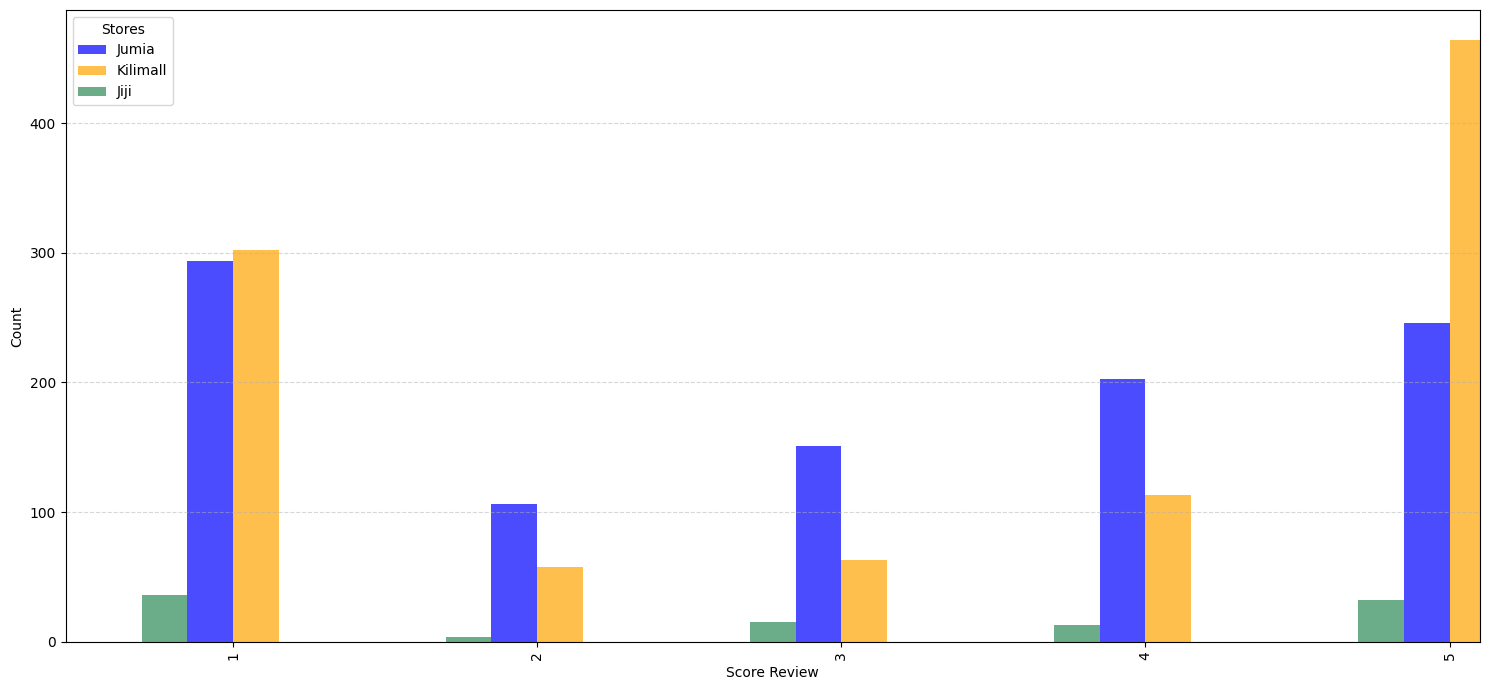

In [44]:
import matplotlib.pyplot as plt

# Set figure size to ensure enough space for comparison
plt.figure(figsize=(15, 7))  # Adjusted to make it more readable

# Adjusted width and position to bring bars closer
bar_width = 0.15  # Smaller width to bring bars closer
space_between_bars = 0.008 # Small gap between bars

# JUMIA (Blue) with adjusted width and position
ax = Jumia_pointsort_data['score'].value_counts().sort_index() \
    .plot(kind='bar', color='blue', alpha=0.7, width=bar_width, position=1, label='Jumia')

# KILIMALL (Orange) with adjusted width and position
Kilimall_pointsort_data['score'].value_counts().sort_index() \
    .plot(kind='bar', color='#FFA500', alpha=0.7, width=bar_width, position=0, label='Kilimall', ax=ax)

# JIJI (Green) with adjusted width and position
Jiji_pointsort_data['score'].value_counts().sort_index() \
    .plot(kind='bar', color='#2E8B57', alpha=0.7, width=bar_width, position=2, label='Jiji', ax=ax)

# Add labels and legend
ax.set_xlabel('Score Review')
ax.set_ylabel('Count')

# Customize grid lines for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add custom legend
plt.legend(title="Stores")

# Adjust layout to ensure no clipping
plt.tight_layout()

# Show the plot
plt.show()

#### Insights

Kilimall has the most reviews at both the highest (5) and lowest (1) scores. Jumia has many positive reviews (scores 4 and 5), more so than negative ones. Jiji has fewer reviews overall, but they tend to be more positive. So, while Kilimall has the most extreme opinions (both good and bad), Jumia appears to have a more consistently positive rating based on this data.

####6.Sentiment Analysis using the pre-trained model Roberta

In [46]:
from transformers import pipeline
classifier_sentiment = pipeline("sentiment-analysis")
classifier_sentiment("I like Africa Data School.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9934509992599487}]

In [49]:
##JUMIA

from transformers import pipeline
import pandas as pd

# Initialize the sentiment analysis classifier
classifier_sentiment = pipeline("sentiment-analysis")

#pd.set_option('display.max_colwidth', None)

# Ensure the DataFrame exists
if 'Jumia_pointsort_data' in locals() or 'Jumia_pointsort_data' in globals():
    # Check if 'extracted_emojis' column exists
    if "extracted_emojis" in Jumia_pointsort_data.columns:
        # Apply sentiment analysis
        Jumia_pointsort_data["sentiment"] = Jumia_pointsort_data["extracted_emojis"].apply(
            lambda x: classifier_sentiment(x)[0]["label"] if isinstance(x, str) else "UNKNOWN"
        )

        # Now extract top 10 positive and negative emoji reviews
        Jumia_positive_reviews = Jumia_pointsort_data[Jumia_pointsort_data['sentiment'] == 'POSITIVE'].head(10)
        Jumia_negative_reviews = Jumia_pointsort_data[Jumia_pointsort_data['sentiment'] == 'NEGATIVE'].head(10)

        print("\nTop 10 Positive Reviews:")
        print(Jumia_positive_reviews[['extracted_emojis', 'sentiment']])

        print("\nTop 10 Negative Reviews:")
        print(Jumia_negative_reviews[['extracted_emojis', 'sentiment']])

    else:
        print("Error: Column 'extracted_emojis' not found in the DataFrame.")
else:
    print("Error: DataFrame 'Jumia_pointsort_data' is not defined.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu



Top 10 Positive Reviews:
                                      extracted_emojis sentiment
677  amazing. greatly organized and genuine product...  POSITIVE
881  perfect platform and great customer service fr...  POSITIVE
23   helpful when searching for products locally, p...  POSITIVE
489  quick response, easy to connect to the seller ...  POSITIVE
280  i have been using jiji since time immemorial w...  POSITIVE
69   very good app for buying and selling if they c...  POSITIVE
436  this app simplifies business. it saves one's t...  POSITIVE
213  good market platform for my products. easy & r...  POSITIVE
739  it's an excellent platform for linking clients...  POSITIVE
378  very fast and no fake business advertisements,...  POSITIVE

Top 10 Negative Reviews:
                                      extracted_emojis sentiment
270  i was suspended for no apparent reason. did no...  NEGATIVE
9    i have had terrible experience this weekend! n...  NEGATIVE
75   great app, i love it! one issue t

In [50]:
##KILIMALL

from transformers import pipeline
import pandas as pd

# Initialize the sentiment analysis classifier
classifier_sentiment = pipeline("sentiment-analysis")

#pd.set_option('display.max_colwidth', None)

# Ensure the DataFrame exists
if 'Kilimall_pointsort_data' in locals() or 'Kilimall_pointsort_data' in globals():
    # Check if 'extracted_emojis' column exists
    if "extracted_emojis" in Kilimall_pointsort_data.columns:
        # Apply sentiment analysis
        Kilimall_pointsort_data["sentiment"] = Jumia_pointsort_data["extracted_emojis"].apply(
            lambda x: classifier_sentiment(x)[0]["label"] if isinstance(x, str) else "UNKNOWN"
        )

        # Now extract top 10 positive and negative emoji reviews
        Kilimall_positive_reviews = Kilimall_pointsort_data[Kilimall_pointsort_data['sentiment'] == 'POSITIVE'].head(10)
        Kilimall_negative_reviews = Kilimall_pointsort_data[Kilimall_pointsort_data['sentiment'] == 'NEGATIVE'].head(10)

        print("\nTop 10 Positive Reviews:")
        print(Kilimall_positive_reviews[['extracted_emojis', 'sentiment']])

        print("\nTop 10 Negative Reviews:")
        print(Kilimall_negative_reviews[['extracted_emojis', 'sentiment']])

    else:
        print("Error: Column 'extracted_emojis' not found in the DataFrame.")
else:
    print("Error: DataFrame 'Jumia_pointsort_data' is not defined.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu



Top 10 Positive Reviews:
                                      extracted_emojis sentiment
436  if it only promoted itself like it did back in...  POSITIVE
378  you people do something about denying sellers ...  POSITIVE
213  delayed notifications, i get a notification bu...  POSITIVE
23                                                None  POSITIVE
15                                                None  POSITIVE
47                                                None  POSITIVE
176                                               None  POSITIVE
25                                                None  POSITIVE
173                                               None  POSITIVE
489                                               None  POSITIVE

Top 10 Negative Reviews:
                                      extracted_emojis sentiment
11   i have had terrible experience this weekend! n...  NEGATIVE
180  it's the best marketing for vehicles. coz what...  NEGATIVE
226  i liked the app because i adverti

In [51]:
##JIJI

from transformers import pipeline
import pandas as pd

# Initialize the sentiment analysis classifier
classifier_sentiment = pipeline("sentiment-analysis")

#pd.set_option('display.max_colwidth', None)

# Ensure the DataFrame exists
if 'Jiji_pointsort_data' in locals() or 'Jiji_pointsort_data' in globals():
    # Check if 'extracted_emojis' column exists
    if "extracted_emojis" in Jumia_pointsort_data.columns:
        # Apply sentiment analysis
        Jiji_pointsort_data["sentiment"] = Jiji_pointsort_data["extracted_emojis"].apply(
            lambda x: classifier_sentiment(x)[0]["label"] if isinstance(x, str) else "UNKNOWN"
        )

        # Now extract top 10 positive and negative emoji reviews
        Jiji_positive_reviews = Jiji_pointsort_data[Jiji_pointsort_data['sentiment'] == 'POSITIVE'].head(10)
        Jiji_negative_reviews = Jiji_pointsort_data[Jiji_pointsort_data['sentiment'] == 'NEGATIVE'].head(10)

        print("\nTop 10 Positive Reviews:")
        print(Jumia_positive_reviews[['extracted_emojis', 'sentiment']])

        print("\nTop 10 Negative Reviews:")
        print(Jiji_negative_reviews[['extracted_emojis', 'sentiment']])

    else:
        print("Error: Column 'extracted_emojis' not found in the DataFrame.")
else:
    print("Error: DataFrame 'Jumia_pointsort_data' is not defined.")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu



Top 10 Positive Reviews:
                                      extracted_emojis sentiment
677  amazing. greatly organized and genuine product...  POSITIVE
881  perfect platform and great customer service fr...  POSITIVE
23   helpful when searching for products locally, p...  POSITIVE
489  quick response, easy to connect to the seller ...  POSITIVE
280  i have been using jiji since time immemorial w...  POSITIVE
69   very good app for buying and selling if they c...  POSITIVE
436  this app simplifies business. it saves one's t...  POSITIVE
213  good market platform for my products. easy & r...  POSITIVE
739  it's an excellent platform for linking clients...  POSITIVE
378  very fast and no fake business advertisements,...  POSITIVE

Top 10 Negative Reviews:
                                     extracted_emojis sentiment
4   i was suspended for no apparent reason. did no...  NEGATIVE
19  i have had terrible experience this weekend! n...  NEGATIVE
1   great app, i love it! one issue thoug

###7.Conclusion
Through real-time sentiment analysis of user reviews from top Kenyan e-commerce platforms, this project uncovers key insights that can shape the development of App X. By analyzing customer feedback, the findings highlight both areas of success and opportunities for improvement, providing a foundation for App X to enhance user satisfaction. The insights aim to help developers build an app that not only meets user expectations but also stands out in the competitive e-commerce market in Kenya.